# 1)

# B) Exploring the data

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors, KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
import math
from tabulate import tabulate
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from statsmodels.tools.eval_measures import rmse

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
pwd

'/Users/prayasdixit/Downloads/DSCI_552/notebook'

In [3]:
data=pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')

## B)i)

In [4]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
data.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [6]:
data.shape


(9568, 5)

#### There is 9568 rows and 5 columns in the data set. Column represents the different parameters of Power plant and rows are the readings for these parameters from year 2006-2011

## B)ii)

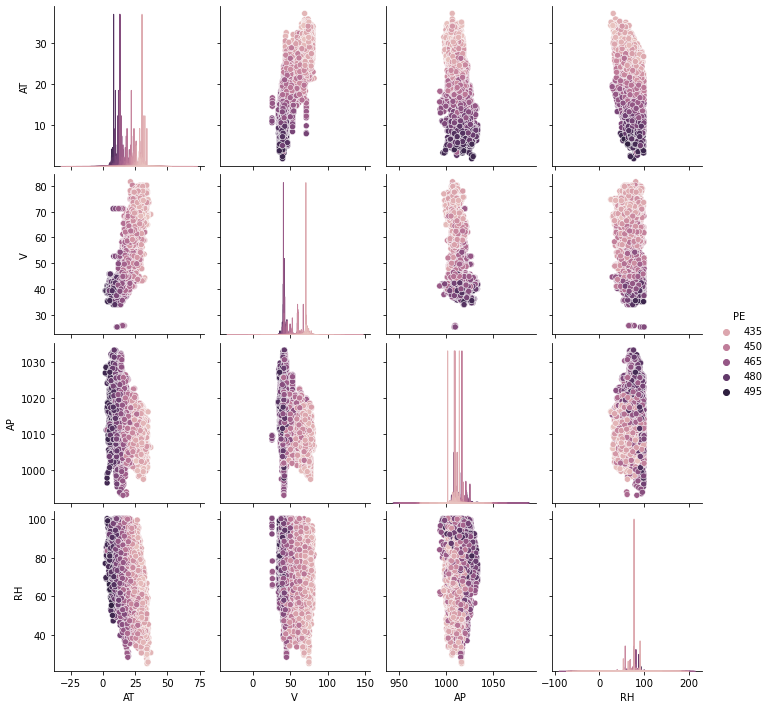

In [7]:
sns.pairplot(data, hue='PE')

#### Here we can see the 'PE' value is high at low 'AT' Temperature value.
#### Same can be referred for 'V' exhaust vaccum i.e 'PE' value is high for comparatively low values of V and as V increases the PE value decreases.

## B)iii)

In [8]:
df=data.describe()

In [9]:
df

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [10]:
df.loc['range']=df.loc['max']-df.loc['min']

In [11]:
df

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
range,35.300000,56.200000,40.410000,74.600000,75.500000


In [12]:
df.loc['InterQuartileRange']=df.loc['75%']-df.loc['25%']

In [13]:
df=df.loc[['mean','min','25%','50%','75%','max','range','InterQuartileRange'],:]

In [14]:
df

,AT,V,AP,RH,PE
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
range,35.300000,56.200000,40.410000,74.600000,75.500000
InterQuartileRange,12.210000,24.800000,8.160000,21.502500,28.680000


In [15]:
print(tabulate(df,tablefmt="grid"))

+--------------------+---------+---------+---------+----------+---------+
| mean               | 19.6512 | 54.3058 | 1013.26 |  73.309  | 454.365 |
+--------------------+---------+---------+---------+----------+---------+
| min                |  1.81   | 25.36   |  992.89 |  25.56   | 420.26  |
+--------------------+---------+---------+---------+----------+---------+
| 25%                | 13.51   | 41.74   | 1009.1  |  63.3275 | 439.75  |
+--------------------+---------+---------+---------+----------+---------+
| 50%                | 20.345  | 52.08   | 1012.94 |  74.975  | 451.55  |
+--------------------+---------+---------+---------+----------+---------+
| 75%                | 25.72   | 66.54   | 1017.26 |  84.83   | 468.43  |
+--------------------+---------+---------+---------+----------+---------+
| max                | 37.11   | 81.56   | 1033.3  | 100.16   | 495.76  |
+--------------------+---------+---------+---------+----------+---------+
| range              | 35.3    | 56.2 

## C)

In [16]:
data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [17]:
LinearModel1=smf.ols('PE~AT',data).fit()


In [18]:
LinearModel1.params[0]

497.034119892767

In [19]:
LinearModel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:56:40   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.000     496.727     497.341
AT            -2.1713      0.007   -291.715      0.000      -2.186      -2.157
==============================================================================
Omnibus:                      417.457   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.844
Skew:                          -0.209   Prob(JB):                    1.83e-243
Kurtosis:                       4.621   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Values for PE (Energy Output)')

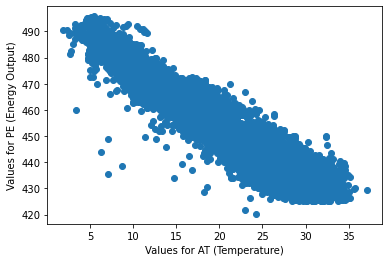

In [20]:
plt.scatter(data['AT'],data['PE'])

plt.xlabel('Values for AT (Temperature)')
plt.ylabel('Values for PE (Energy Output)')

In [21]:
prediction_done=LinearModel1.predict(data)

In [22]:
type(prediction_done)

pandas.core.series.Series

Text(0, 0.5, 'Values for PE (Energy Output)')

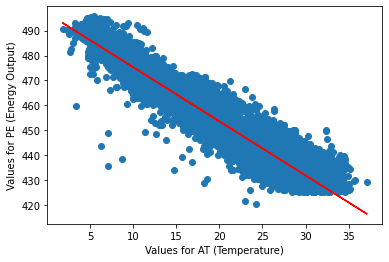

In [23]:
plt.scatter(data['AT'],data['PE'])
plt.plot(data['AT'],prediction_done,color='red')
plt.xlabel('Values for AT (Temperature)')
plt.ylabel('Values for PE (Energy Output)')

# The red line is our fitted linear regression.

In [24]:
LinearModel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:56:40   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.000     496.727     497.341
AT            -2.1713      0.007   -291.715      0.000      -2.186      -2.157
==============================================================================
Omnibus:                      417.457   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.844
Skew:                          -0.209   Prob(JB):                    1.83e-243
Kurtosis:                       4.621   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
## Now we will do the same steps for other variables too.


In [26]:
LinearModel2=smf.ols('PE~V',data).fit()

In [27]:
prediction_done=LinearModel2.predict(data)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:56:40   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.000     517.061     518.542
V             -1.1681      0.007   -172.402      0.000      -1.181      -1.155
==============================================================================
Omnibus:                       77.693   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.571
Skew:                          -0.097   Prob(JB):                     1.61e-24
Kurtosis:                       3.487   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

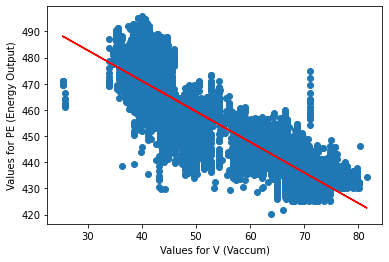

In [28]:
plt.scatter(data['V'],data['PE'])
plt.plot(data['V'],prediction_done,color='red')
plt.xlabel('Values for V (Vaccum)')
plt.ylabel('Values for PE (Energy Output)')

LinearModel2.summary()

In [29]:
LinearModel3=smf.ols('PE~AP',data).fit()

In [30]:
prediction_done=LinearModel3.predict(data)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:56:40   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.000   -1105.167   -1005.355
AP             1.4899      0.025     59.296      0.000       1.441       1.539
==============================================================================
Omnibus:                      525.438   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.290
Skew:                           0.616   Prob(JB):                    1.10e-133
Kurtosis:                       2.859   Cond. No.                     1.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

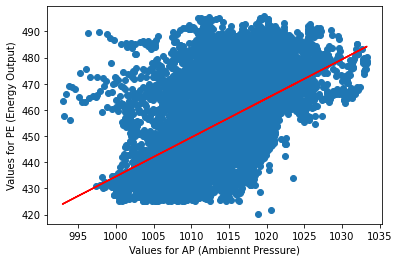

In [31]:
plt.scatter(data['AP'],data['PE'])
plt.plot(data['AP'],prediction_done,color='red')
plt.xlabel('Values for AP (Ambiennt Pressure)')
plt.ylabel('Values for PE (Energy Output)')
LinearModel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:56:40   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.000     419.349     422.574
RH             0.4557      0.011     41.399      0.000       0.434       0.477
==============================================================================
Omnibus:                      772.278   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.245
Skew:                           0.231   Prob(JB):                     4.75e-70
Kurtosis:                       2.234   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

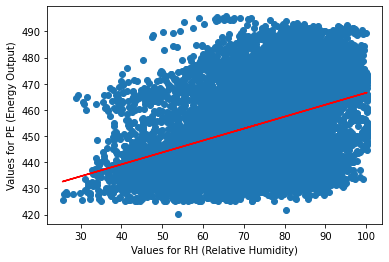

In [32]:
LinearModel4=smf.ols('PE~RH',data).fit()
prediction_done=LinearModel4.predict(data)


plt.scatter(data['RH'],data['PE'])
plt.plot(data['RH'],prediction_done,color='red')
plt.xlabel('Values for RH (Relative Humidity)')
plt.ylabel('Values for PE (Energy Output)')
LinearModel4.summary()

### From the plots shown above we can clearly see that, all the variables have significant association with the dependent variable because all have p value significantly less than the threshold value which is .05

## Now for outlier analysis we will use interquartile range.

In [33]:
df

,AT,V,AP,RH,PE
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
range,35.300000,56.200000,40.410000,74.600000,75.500000
InterQuartileRange,12.210000,24.800000,8.160000,21.502500,28.680000


In [34]:
Lower_bound=df.loc['25%','AT'] - ((df.loc['InterQuartileRange','AT'])*1.5)

In [35]:
Lower_bound

-4.804999999999998

In [36]:
Upper_bound=df.loc['75%','AT'] + ((df.loc['InterQuartileRange','AT'])*1.5)

In [37]:
Upper_bound

44.035

In [38]:
data[(data['AT']<Lower_bound) | (data['AT']>Upper_bound)]

,AT,V,AP,RH,PE


In [39]:
# We can clearly see there is no outlier in AT variable.
# Now we will check for RH variable.

In [40]:
Lower_bound=df.loc['25%','RH'] - ((df.loc['InterQuartileRange','RH'])*1.5)
Upper_bound=df.loc['75%','RH'] + ((df.loc['InterQuartileRange','RH'])*1.5)
print(Lower_bound,Upper_bound)
data[(data['RH']<Lower_bound) | (data['RH']>Upper_bound)]

31.073750000000004 117.08375


,AT,V,AP,RH,PE
789,34.30,74.67,1015.98,25.89,427.84
2262,33.94,74.67,1015.94,28.16,427.98
3603,19.78,44.71,1015.70,29.43,465.49
4367,34.65,74.67,1016.03,26.67,427.69
6472,33.83,67.90,1005.94,29.86,428.12
7983,19.31,44.71,1016.13,30.59,463.00
8061,34.24,74.67,1016.24,25.56,425.58
8737,18.76,44.71,1015.15,30.83,462.18
8751,19.32,44.71,1015.30,28.81,464.38
9015,35.01,74.67,1016.10,26.30,428.48


In [41]:
Lower_bound=df.loc['25%','V'] - ((df.loc['InterQuartileRange','V'])*1.5)
Upper_bound=df.loc['75%','V'] + ((df.loc['InterQuartileRange','V'])*1.5)
print(Lower_bound,Upper_bound)
data[(data['V']<Lower_bound) | (data['V']>Upper_bound)]

4.539999999999999 103.74000000000001


,AT,V,AP,RH,PE


In [42]:
Lower_bound=df.loc['25%','AP'] - ((df.loc['InterQuartileRange','AP'])*1.5)
Upper_bound=df.loc['75%','AP'] + ((df.loc['InterQuartileRange','AP'])*1.5)
print(Lower_bound,Upper_bound)
data[(data['AP']<Lower_bound) | (data['AP']>Upper_bound)]

996.8600000000001 1029.5


,AT,V,AP,RH,PE
238,13.49,44.47,1030.46,69.49,466.66
319,9.25,41.82,1033.25,74.73,478.48
368,13.49,44.47,1030.18,69.15,468.46
536,9.11,40.02,1031.10,83.02,479.03
571,5.97,36.25,1029.65,86.74,487.03
...,...,...,...,...,...
9068,15.62,41.23,992.89,83.99,463.21
9159,7.20,40.02,1031.71,69.89,480.53
9267,12.51,41.92,1031.21,64.66,468.41
9342,8.72,40.02,1031.32,78.09,477.86


### We can clearly see that the data have some outliers for 'AP' and 'RH' variables. I have also printed the observations which are detected as outliers.

## D)

In [43]:
LinearModel5=smf.ols('PE~AT+V+AP+RH',data).fit()
prediction_done=LinearModel5.predict(data)
# plt.scatter(data['AP'],data['PE'])
# plt.plot(data['AP'],prediction_done,color='red')
# plt.xlabel('Values for AP (Ambiennt Pressure)')
# plt.ylabel('Values for PE (Energy Output)')

LinearModel5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:56:40   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### We can reject the null hypothesis for all variable because each of them have some coefficient value which
### will affect the regression value and also p value for all of them is qpproximately 0 and less than .05.

## E) Plotting results from question C and question D

Coeff. on Linear Regression(AT): -2.1713199585178047 and Coeff. on Multiple Regression(AT): -1.9775131066353864
Coeff. on Linear Regression(V): -1.1681351265557107 and Coeff. on Multiple Regression(V): -0.2339164225825025
Coeff. on Linear Regression(AP): 1.4898716733991129 and Coeff. on Multiple Regression(AP): 0.06208294378084911
Coeff. on Linear Regression(RH): 0.45565010226298014 and Coeff. on Multiple Regression(RH): -0.15805410291641003


Text(0, 0.5, 'Coefficient on Multiple Linear Regression')

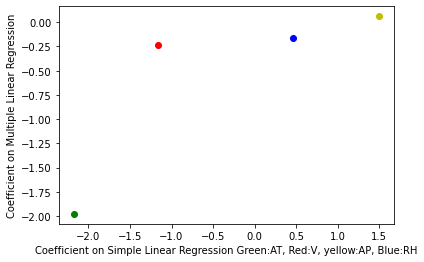

In [44]:
print('Coeff. on Linear Regression(AT):',LinearModel1.params[1],'and','Coeff. on Multiple Regression(AT):',LinearModel5.params[1])
plt.scatter(LinearModel1.params[1],LinearModel5.params[1], color='g')
print('Coeff. on Linear Regression(V):',LinearModel2.params[1],'and','Coeff. on Multiple Regression(V):',LinearModel5.params[2])
plt.scatter(LinearModel2.params[1],LinearModel5.params[2],color='red')
print('Coeff. on Linear Regression(AP):',LinearModel3.params[1],'and','Coeff. on Multiple Regression(AP):',LinearModel5.params[3])
plt.scatter(LinearModel3.params[1],LinearModel5.params[3],color='y')
print('Coeff. on Linear Regression(RH):',LinearModel4.params[1],'and','Coeff. on Multiple Regression(RH):',LinearModel5.params[4])
plt.scatter(LinearModel4.params[1],LinearModel5.params[4],color='b')

plt.xlabel('Coefficient on Simple Linear Regression Green:AT, Red:V, yellow:AP, Blue:RH')
plt.ylabel('Coefficient on Multiple Linear Regression')

#### If we compare the results for coefficients for linear Regression and Multiple Regression we can easily say that magnitude or absolute value of coefficient of Linear regression are more than the Multiple regression.

## F)

In [45]:
# Trying statsmodel to do polynomial regression

In [46]:
df1=data['AT']
df2=data['PE']
poly=PolynomialFeatures(degree=3)
df1=pd.DataFrame(df1)
at=poly.fit_transform(df1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:56:40   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.3641      0.336    732.248      0.000     245.705     247.024
at[0]        246.3641      0.336    732.248      0.000     245.705     247.024
at[1]         -0.6103      0.124     -4.941      0.000      -0.852      -0.368
at[2]         -0.1251      0.007    -18.199      0.000      -0.139      -0.112
at[3]          0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     3.18e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.97e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

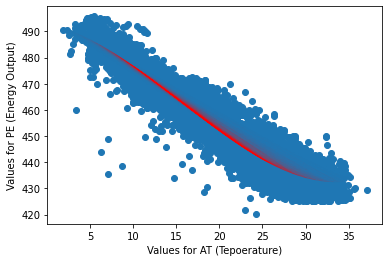

In [47]:

LinearModel4=smf.ols('PE~at',data).fit()
prediction_done=LinearModel4.predict(data)



plt.scatter(data['AT'],data['PE'])
plt.plot(data['AT'],prediction_done,color='red',linewidth=.001)
plt.xlabel('Values for AT (Tepoerature)')
plt.ylabel('Values for PE (Energy Output)')
LinearModel4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:56:41   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    277.0734      4.575     60.557      0.000     268.105     286.042
v[0]         277.0734      4.575     60.557      0.000     268.105     286.042
v[1]          -2.1444      0.509     -4.214      0.000      -3.142      -1.147
v[2]          -0.0027      0.009     -0.294      0.768      -0.021       0.015
v[3]           0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
==============================================================================
Omnibus:                      160.101   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.778
Skew:                          -0.125   Prob(JB):                     1.77e-61
Kurtosis:                       3.800   Cond. No.                     1.12e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.82e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

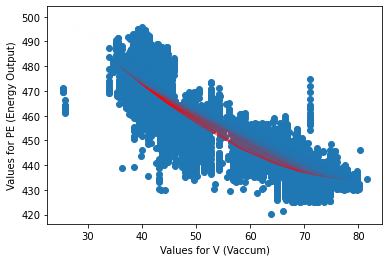

In [48]:
df1=data['V']
df2=data['PE']
poly=PolynomialFeatures(degree=3)
df1=pd.DataFrame(df1)
v=poly.fit_transform(df1)

LinearModel4=smf.ols('PE~v',data).fit()
prediction_done=LinearModel4.predict(data)


plt.scatter(data['V'],data['PE'])
plt.plot(data['V'],prediction_done,color='red',linewidth=.001)
plt.xlabel('Values for V (Vaccum)')
plt.ylabel('Values for PE (Energy Output)')
LinearModel4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:56:41   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0747      0.009      8.415      0.000       0.057       0.092
ap[0]          0.0747      0.009      8.415      0.000       0.057       0.092
ap[1]         25.2554      3.001      8.415      0.000      19.372      31.139
ap[2]         -0.0500      0.006     -8.439      0.000      -0.062      -0.038
ap[3]       2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
==============================================================================
Omnibus:                      556.766   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.319
Skew:                           0.621   Prob(JB):                    9.05e-140
Kurtosis:                       2.751   Cond. No.                     3.55e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.2e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

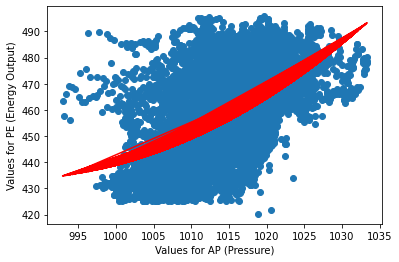

In [49]:
df1=data['AP']
df2=data['PE']
poly=PolynomialFeatures(degree=3)
df1=pd.DataFrame(df1)
ap=poly.fit_transform(df1)

LinearModel4=smf.ols('PE~ap',data).fit()
prediction_done=LinearModel4.predict(data)


plt.scatter(data['AP'],data['PE'])
plt.plot(data['AP'],prediction_done,color='red')
plt.xlabel('Values for AP (Pressure)')
plt.ylabel('Values for PE (Energy Output)')
LinearModel4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:56:41   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    234.2068      5.272     44.422      0.000     223.872     244.542
rh[0]        234.2068      5.272     44.422      0.000     223.872     244.542
rh[1]         -1.7292      0.486     -3.557      0.000      -2.682      -0.776
rh[2]          0.0321      0.007      4.433      0.000       0.018       0.046
rh[3]         -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05
==============================================================================
Omnibus:                      707.867   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.057
Skew:                           0.223   Prob(JB):                     2.56e-66
Kurtosis:                       2.253   Cond. No.                     4.78e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.03e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

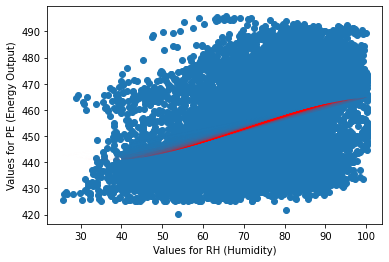

In [50]:
df1=data['RH']
df2=data['PE']
poly=PolynomialFeatures(degree=3)
df1=pd.DataFrame(df1)
rh=poly.fit_transform(df1)

LinearModel4=smf.ols('PE~rh',data).fit()
prediction_done=LinearModel4.predict(data)


plt.scatter(data['RH'],data['PE'])
plt.plot(data['RH'],prediction_done,color='red',linewidth=.001)
plt.xlabel('Values for RH (Humidity)')
plt.ylabel('Values for PE (Energy Output)')
LinearModel4.summary()

### We can clearly see that there is non linear association between the AT and PE, AP and PE, RH and PE. In case of V, V**2 is not significant for the model because it has p value greater than .05(threshold) value.

## G)

In [51]:
LinearModel_g=smf.ols('PE~AT+V+AP+RH + AT*RH +AT*AP +AT*V + V*AP +V*RH +AP*RH',data).fit()
prediction_done=LinearModel_g.predict(data)
# plt.scatter(data['AP'],data['PE'])
# plt.plot(data['AP'],prediction_done,color='red')
# plt.xlabel('Values for AP (Ambiennt Pressure)')
# plt.ylabel('Values for PE (Energy Output)')

LinearModel_g.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:56:41   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.000     531.631     839.934
AT            -4.3470      2.373     -1.832      0.067      -8.999       0.305
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
RH             1.5709      0.773      2.031      0.042       0.055       3.087
AT:RH         -0.0052      0.001     -6.444      0.000      -0.007      -0.004
AT:AP          0.0018      0.002      0.752      0.452      -0.003       0.006
AT:V           0.0210      0.001     23.338      0.000       0.019       0.023
V:AP           0.0068      0.001      5.135      0.000       0.004       0.009
V:RH           0.0008      0.000      1.716      0.086      -0.000       0.002
AP:RH         -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### We can clearly see that the pvalue of (AT-RH), (AT-V), (V-AP), (AP-RH) is quite below .05. Hence, these pairwise interactions are statistically significant.

## H)

In [52]:
data_train,data_test=train_test_split(data,test_size=.3,random_state=0)

In [53]:
X=data.loc[:,'AT':'RH']
y=data['PE']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)
#Fitting Model
linear_model  = smf.ols("PE ~ AT + V + AP + RH", data_train).fit()

#Prediction on train data and computing mse.

prediction2=linear_model.predict(data_train)
print('Training MSE ->',mean_squared_error( y_train,prediction2))

#Prediction on test data and computing mse.
prediction=linear_model.predict(data_test)
rms_error = rmse(y_test, prediction)
Complete_reg_MSE=mean_squared_error(y_test, prediction)
print('Testing MSE ->',Complete_reg_MSE)
# Here we have built a multiple regression model with all independent variables.
# Now, In next step we will built a regression model with all interactions as well as quadratic terms.

Training MSE -> 20.941563616739586
Testing MSE -> 20.36838300288591


In [54]:
df1=data['AT']
df2=data['V']
df3=data['AP']
df4=data['RH']
df5=data['PE']


# poly=PolynomialFeatures(degree=2)

# df1=pd.DataFrame(df1)
# df2=pd.DataFrame(df2)
# df3=pd.DataFrame(df3)
# df4=pd.DataFrame(df4)

# at=poly.fit_transform(df1)
# v=poly.fit_transform(df2)
# ap=poly.fit_transform(df3)
# rh=poly.fit_transform(df4)

LinearModel_H=smf.ols('PE ~ AT + V + AP + RH + I(AT**2) + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH  + I(V**2) + I(AP**2) + I(RH**2)',data_train).fit()
prediction_done=LinearModel_H.predict(data_test)
#rms_error = rmse(y_test, prediction)
print('Testing MSE->',mean_squared_error(y_test, prediction))

LinearModel_H.summary()

Testing MSE-> 20.36838300288591


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7075.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:56:41   Log-Likelihood:                -19248.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6682   BIC:                         3.863e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7073.1567   1505.522     -4.698      0.000      -1e+04   -4121.854
AT            -6.3067      3.826     -1.648      0.099     -13.807       1.194
V             -2.7832      1.818     -1.531      0.126      -6.347       0.780
AP            14.8033      2.916      5.076      0.000       9.086      20.521
RH             3.3825      1.086      3.114      0.002       1.253       5.512
I(AT ** 2)     0.0168      0.004      4.482      0.000       0.009       0.024
AT:V           0.0103      0.003      3.174      0.002       0.004       0.017
AT:AP          0.0037      0.004      0.997      0.319      -0.004       0.011
AT:RH         -0.0061      0.002     -3.305      0.001      -0.010      -0.002
V:AP           0.0023      0.002      1.290      0.197      -0.001       0.006
V:RH           0.0003      0.001      0.340      0.734      -0.001       0.002
AP:RH         -0.0031      0.001     -2.934      0.003      -0.005      -0.001
I(V ** 2)     -0.0005      0.001     -0.551      0.581      -0.002       0.001
I(AP ** 2)    -0.0072      0.001     -5.108      0.000      -0.010      -0.004
I(RH ** 2)    -0.0019      0.000     -5.901      0.000      -0.003      -0.001
==============================================================================
Omnibus:                     1415.014   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12113.210
Skew:                          -0.770   Prob(JB):                         0.00
Kurtosis:                       9.406   Cond. No.                     2.96e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Here we will remove those terms whose p value is greater than .05 because it won't be significant for model. We will remove : V**2 AT,V,AT:AP, V:AP, V:RH

In [55]:
linear_model_H2=smf.ols('PE ~ V+ AT + AP + RH + I(AT**2) + AT*V  + AT*RH + AP*RH  + I(AP**2) + I(RH**2) ',data_train).fit()

#Prediction on train data and computing mse.

prediction2=linear_model_H2.predict(data_train)
print('Training MSE ->',mean_squared_error( y_train,prediction2))

#Prediction on test data and computing mse.
prediction=linear_model_H2.predict(data_test)
rms_error = rmse(y_test, prediction)
MSE_removed_features=mean_squared_error(y_test, prediction)
print('Testing MSE ->',MSE_removed_features)
# print(mean_squared_error(y_test, prediction))


Training MSE -> 18.39935579904325
Testing MSE -> 17.56566959660093


In [56]:
## After removing the specific columns our mean square error is getting decreased which was desirable.
## Significant Features:  V, AT , AP , RH , (AT**2) , AT*V  , AT*RH , AP*RH ,(AP**2) ,(RH**2) 

## I) KNN Regression

### a)Doing without normalizing the data

In [57]:
X=data.loc[:,'AT':'RH']
y=data['PE']


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
# SPlitting the data

In [59]:
X_train
#Checking the splitted data

,AT,V,AP,RH
4507,15.83,41.67,1013.39,74.12
287,22.56,62.26,1012.11,63.16
4018,22.11,59.80,1016.86,70.14
4624,19.96,56.03,1020.59,64.95
8507,21.70,70.32,1009.12,91.30
...,...,...,...,...
7891,16.21,50.90,1012.46,84.45
9225,13.85,44.90,1019.11,76.79
4859,16.81,38.52,1018.26,75.21
3264,12.80,41.16,1022.43,86.19


In [60]:
final_list_test= [] # Storing mse values for different k
final_list_train= [] 
for K in range(1,101,1):
    temp_list1=[]
    temp_list2=[]
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    
    predictions1=model.predict(X_test) # prediction on test set
    error_test = (mean_squared_error(y_test,predictions1)) 
    temp_list1.append(K)
    temp_list1.append(error_test)
    
    predictions2=model.predict(X_train) #prediction on train set
    error_train=(mean_squared_error(y_train,predictions2)) 
    temp_list2.append(K)
    temp_list2.append(error_train)
    
    final_list_test.append(temp_list1)#Store mse values along with its k
    final_list_train.append(temp_list2)
    #print('MSE value for k= ' , K , 'is:', error)


In [61]:
k_list=[]
for i in range(1,101,1):
    k_list.append(1/i)
#Creating a lisk k with all values of k from 1 to 100

In [62]:
pl_test=[]
for i in final_list_test:
    pl_test.append(i[1])
pl_train=[]
for j in final_list_train:
    pl_train.append(j[1])

# Creating two list one is for test mse's and other one is for train mse's.

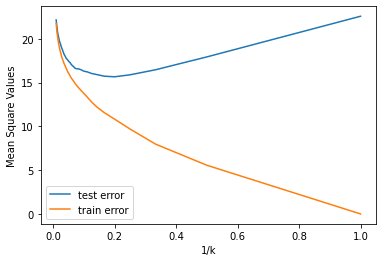

In [63]:
plt.plot(k_list,pl_test,label='test error')
plt.plot(k_list,pl_train,label='train error')
plt.ylabel('Mean Square Values')
plt.xlabel('1/k')
plt.legend()

In [64]:
Final_sorted_list=sorted(final_list_test,key=lambda x: (x[1],-x[0]))
# Using lambda along with sorted method to sort the list in increasing order.

In [65]:
uu,vv=Final_sorted_list[0]
print('With Knn Regressor model  best k is ->',uu,'and its MSE is->',vv)


With Knn Regressor model  best k is -> 5 and its MSE is-> 15.6635051689307


### b) Now, we will normalize the data first then train our regression model

In [66]:
scaler = StandardScaler()  # Scaling X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test) 

In [67]:
X_train=pd.DataFrame(X_train_scaled)
X_test=pd.DataFrame(X_test_scaled)

In [68]:
final_list_test= [] # Storing mse values for different k
final_list_train= [] 
for K in range(1,101,1):
    temp_list1=[]
    temp_list2=[]
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    
    predictions1=model.predict(X_test) # prediction on test set
    error_test = (mean_squared_error(y_test,predictions1)) 
    temp_list1.append(K)
    temp_list1.append(error_test)
    
    predictions2=model.predict(X_train) #prediction on train set
    error_train=(mean_squared_error(y_train,predictions2)) 
    temp_list2.append(K)
    temp_list2.append(error_train)
    
    final_list_test.append(temp_list1)#Store mse values along with its k
    final_list_train.append(temp_list2)
    #print('MSE value for k= ' , K , 'is:', error)



In [69]:
pl_test=[]
for i in final_list_test:
    pl_test.append(i[1])
pl_train=[]
for j in final_list_train:
    pl_train.append(j[1])

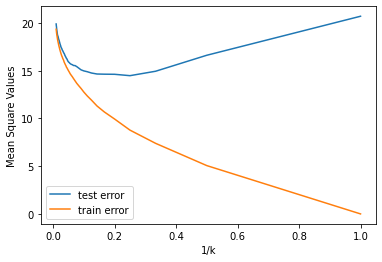

In [70]:
plt.plot(k_list,pl_test,label='test error')
plt.plot(k_list,pl_train,label='train error')
plt.ylabel('Mean Square Values')
plt.xlabel('1/k')
plt.legend()

In [71]:
Final_sorted_list=sorted(final_list_test,key=lambda x: (x[1],-x[0]))
# Using lambda along with sorted method to sort the list in increasing order.

In [72]:
u,v=Final_sorted_list[0]
print('With Knn Regressor model  best k is ->',u,'and its MSE is->',v)

With Knn Regressor model  best k is -> 4 and its MSE is-> 14.486735225095789


In [73]:
## So with normalization our MSE is getting reduced.

## J) Comparing Linear Regression and KNN Regression model MSE errors.

In [74]:
head= ["Model","Test Mean Squared Error"]
table= [["Complete Regression Model ('AT','V','AP','RH')" ,Complete_reg_MSE],["Regression Model After removing some features",MSE_removed_features],["KNN regression without Normalization",vv],["KNN regression after Normalization",v]]
print(tabulate(table, headers=head, tablefmt="grid"))

+------------------------------------------------+---------------------------+
| Model                                          |   Test Mean Squared Error |
+================================================+===========================+
| Complete Regression Model ('AT','V','AP','RH') |                   20.3684 |
+------------------------------------------------+---------------------------+
| Regression Model After removing some features  |                   17.5657 |
+------------------------------------------------+---------------------------+
| KNN regression without Normalization           |                   15.6635 |
+------------------------------------------------+---------------------------+
| KNN regression after Normalization             |                   14.4867 |
+------------------------------------------------+---------------------------+


### Here, we can clearly see that our Knn Regression model with normalization performed better than other models because it has the least MSE value. However, both models have their own characterstics as in Linear model we get summary method and using that method we can remove the insignificant features which could be very useful in many cases.